In [ ]:
# Maximo F. Hizon, 192448
# Santino Gabriel F. Campos, 185482
# Mallory Belicia T. Maroket, 193266
# November 22, 2021

# I/we certify that this submission complies with the DISCS Academic Integrity
# Policy.

# If I/we have discussed my/our Python language code with anyone other than
# my/our instructor(s), my/our groupmate(s), the teaching assistant(s),
# the extent of each discussion has been clearly noted along with a proper
# citation in the comments of my/our program.

# If any Python language code or documentation used in my/our program
# was obtained from another source, either modified or unmodified, such as a
# textbook, website, or another individual, the extent of its use has been
# clearly noted along with a proper citation in the comments of my/our program.

################################################################################

# Montalan, J. R. E. (n.d.). Natural Language Processing. Google Drive. Retrieved October 7, 2021, from https://drive.google.com/drive/folders/1dg_lCermrSEpseTolXCRY8mevM0SUihs.

In [ ]:
!pip install pickle-mixin nltk sklearn
!pip install pandas

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

In [ ]:
tweets = pd.read_csv('bonggo_tweets.csv', index_col=None, header=0)

In [ ]:
#Partially based off of Sir Railey's Code
def clean_tweets_context(tweets, keep_hashtags=False):
    tweets['cleaned_text'] = tweets['tweet'].fillna('') # Remove blank texts

    #https://stackoverflow.com/questions/54733828/remove-twitter-mentions-from-pandas-column#comment115051827_54734032
    tweets['cleaned_text'] = tweets['cleaned_text'].str.replace(r'@[A-Za-z0-9_]+', '') #Remove twitter mention 
    tweets['cleaned_text'] = tweets['cleaned_text'].str.replace(r'&[^ ]+', '')

    if keep_hashtags:
        #https://stackoverflow.com/questions/54733828/remove-twitter-mentions-from-pandas-column#comment115051827_54734032
        tweets['cleaned_text'] = tweets['cleaned_text'].str.replace(r'#', '') #Remove twitter hashtag but KEEP HASHTAG CONTENT 
    else:
        #https://stackoverflow.com/questions/54733828/remove-twitter-mentions-from-pandas-column#comment115051827_54734032
        tweets['cleaned_text'] = tweets['cleaned_text'].str.replace(r'#[A-Za-z0-9_]+', '') #Remove twitter hashtag 

    tweets['cleaned_text'] = tweets['cleaned_text'].str.replace(r'([^A-Za-z0-9_ \t])|(\w+:\/\/\S+)', '') # Remove non-alphanumeric characters
    tweets['cleaned_text'] = tweets['cleaned_text'].str.replace(r'^\s+|\s+$', '')  # Remove trailing and leading whitespaces
    #https://www.geeksforgeeks.org/python-pandas-series-str-len/
    tweets = tweets[tweets['cleaned_text'].str.len() > 0]

    return tweets

In [ ]:
cleaned_tweets = clean_tweets_context(tweets)
cleaned_tweets.to_csv('cleaned_bonggo_tweets.csv', index=False)

#Translating Tagalog Tweets to English

The following blocks will help us assess Tagalogness of our tweets in order to aid in Translation



In [ ]:
#https://stackoverflow.com/questions/3788870/how-to-check-if-a-word-is-an-english-word-with-python
from nltk.corpus import words

#NLTK download if word database is not downloaded. Uncomment to get words
#import nltk
#nltk.download('words')

en_words = set(words.words())

#Function used to define the proportion of English words and therefore the 'Englishness' of a sentence that is reprsented here as a String.
def english_proportion(text):
    words = text.split()
    english = 0
    non_english = 0
    
    for word in words:
        #print("TESTING: ", word)
        if word.lower() in en_words:
            english += 1
            #print("CONFIRMED")

    return english/len(words)


#Below function is used to translate any text (represented by 'text' parameter into any target language represented by the 'target' parameter
def translate_text(target, text):
    #https://cloud.google.com/translate/docs/basic/translating-text <- This function is modified code snippet coming from this link
    #Below comment is environment variable assignment for Google Cloud Credential and Translation Product Access
    #%env GOOGLE_APPLICATION_CREDENTIALS=CREDENTIAL_FILE_HERE

    """Translates text into the target language.

    Target must be an ISO 639-1 language code.
    See https://g.co/cloud/translate/v2/translate-reference#supported_languages
    """
    import six
    from google.cloud import translate_v2 as translate

    translate_client = translate.Client()

    if isinstance(text, six.binary_type):
        text = text.decode("utf-8")

    # Text can also be a sequence of strings, in which case this method
    # will return a sequence of results for each text.
    #https://stackoverflow.com/questions/43941168/specify-source-language-google-translation-api-in-python?rq=1
    result = translate_client.translate(text, source_language='tl', target_language=target)

    return result["translatedText"] 

In [ ]:
#Allow display of full text
pd.set_option('max_colwidth', 200)

cleaned_tweets["EN_PERCENTAGE"] = cleaned_tweets['cleaned_text'].apply(lambda d : english_proportion(d))
cleaned_tweets.sample(5)[['cleaned_text', 'EN_PERCENTAGE']].sort_values(['EN_PERCENTAGE'], ascending=False)

,cleaned_text,EN_PERCENTAGE
395,TO Demolition team targetting Bong Go Pls provide proof As these insunuations were thrown before PRRD by those who lost the election last 2016 Either from Binay to De Lima Liberal Party,0.781250
1892,Bong Go Severus Snape Ya heard it here first,0.777778
17,I think we arejust waiting for a time Ultimately Bong Go wwill withdraw ang giveway to BBM,0.705882
1628,Pag Nanalo si Bong Go pwedeng si Polong But if BBM wins Arroyo will be the speaker sha utak nung bbmsara tandem,0.590909
276,atleast hindi SANA all sinabi ni Bong Go hahahaha,0.444444


Now that we have a metric for assessing Tagalogness of a tweet, we can now determine how many tweets in our dataset are Tagalog or English

In [ ]:
#Below code is used in order to obtain number of tweets that are at least X% English. 

for i in range(10):
    threshold = 0.5 + (i/20)
    #https://stackoverflow.com/a/15943975
    en = cleaned_tweets[cleaned_tweets["EN_PERCENTAGE"] > threshold].shape[0]
    print("Minimum English Proportion threshold: ", threshold*100, "%")
    print("Number of tweets meeting Threshold: ", en)
    print("Number of non-English Tweets: ", cleaned_tweets.shape[0] - en)
    print("================================")

Minimum English Proportion threshold:  50.0 %
Number of tweets meeting Threshold:  1814
Number of non-English Tweets:  895
Minimum English Proportion threshold:  55.00000000000001 %
Number of tweets meeting Threshold:  1658
Number of non-English Tweets:  1051
Minimum English Proportion threshold:  60.0 %
Number of tweets meeting Threshold:  1413
Number of non-English Tweets:  1296
Minimum English Proportion threshold:  65.0 %
Number of tweets meeting Threshold:  1245
Number of non-English Tweets:  1464
Minimum English Proportion threshold:  70.0 %
Number of tweets meeting Threshold:  1029
Number of non-English Tweets:  1680
Minimum English Proportion threshold:  75.0 %
Number of tweets meeting Threshold:  808
Number of non-English Tweets:  1901
Minimum English Proportion threshold:  80.0 %
Number of tweets meeting Threshold:  608
Number of non-English Tweets:  2101
Minimum English Proportion threshold:  85.0 %
Number of tweets meeting Threshold:  440
Number of non-English Tweets:  2269

These metrics look initially promising : at least half of the tweets in our dataset are around 60% English, but let's take a closer look on what these values really mean

In [ ]:
#Function used to obtained sample of tweets between (threshold%) and (threshold-10)% Englishness
def close_up(threshold, df):
    print("Tweets between than {0} and {1} Englishness ".format((str(((threshold-.1)*100)) + "%"), (str((threshold*100)) + "%")))
    
    #https://www.geeksforgeeks.org/how-to-randomly-select-rows-from-pandas-dataframe/
    return df[(df["EN_PERCENTAGE"] < threshold) & (df["EN_PERCENTAGE"] > threshold-0.1)][['cleaned_text', 'EN_PERCENTAGE']].sample(10).sort_values("EN_PERCENTAGE", ascending=False)

close_up(0.6, cleaned_tweets)

Tweets between than 50.0% and 60.0% Englishness 


,cleaned_text,EN_PERCENTAGE
1535,bong go is not in the picture yet and we also need kiko to win ayoko nang makita pa mukha ni digong at GMA sa gobyerno maghintay sila pagkatapos ng pasko,0.580645
782,kung sakali lang na mag widraw later on c bong go kanino cla boboto,0.571429
1635,Iniwasan po ni Bong Go and PRRD ang VP position Si Bato naman po was saying na d kalaban si BBM So dyan palang po alam na So wag po kayong magpadala sa black propaganda ng gaya ni Cece at ng ib...,0.568966
194,Exactly Alam mo yun para may something dba ibig sbhn d katiwala tiwala si bong go,0.562500
1451,Ang malala yung kabirthday ko si Bong Go at Donald Trump,0.545455
1416,Gy bng chy g u ai nhn ln hay sao d,0.545455
2226,Kanino bang mga bata ang umasikaso ng train airports vaccine highways BBM ba Si Sara ba Tingin niyo walang hand si Bong Go sa national policies ng Gobyerno Kulang sa common sense mga tao sa soc me...,0.541667
1965,President Bong Go Vice President Sara Zimmerman Duterte Senate President Rodrigo Roa Duterte,0.538462
1241,NTFELCAC SPOKESPERSON PARLADE PROBLEMA NG BAYAN SI BONG GO RED TAG BA YAN LAGOT KA KAY DU30,0.529412
1831,panagutan mo ang FAKENEWS na ginawa mo last saturdays FB live May pa FREEPRD ka pang nalalaman,0.529412



Tweets at 50% Englishness are still mostly Tagalog tweets. A higher threshold value will be needed in order to assess a possible delimitation from English and Tagalog tweets



In [ ]:
close_up(0.8, cleaned_tweets)

Tweets between than 70.0% and 80.0% Englishness 


,cleaned_text,EN_PERCENTAGE
2106,President Duterte will join the Senate race contradicting his previous pronouncement that he will retire from politics after he steps down from Malacaang Presidential aspirant Sen Christopher Bon...,0.794118
1932,Former PNP Chief Eleazar is also running outside Bong Gos Senate slate Very telling Hmmm I am sensing a lot of revelations about BG come campaign period He asked for it,0.774194
2379,A vote for bong go is a vote for leni Its bbm vs leni Every vote lost to any other candidate than bbm will help leni,0.769231
1581,Ok lang may Bong Go pa kami na option basta NEVER TO PINK,0.769231
943,Can yall go take a big phat throat quenching spicy hot fire bong rip for me Goodnight,0.764706
1990,Duterte will be running for Senator under the Pederalisimo ng Dugong Dakilang Samahan or PDDS the same party that supported the Presidential bid of Senator Bong Go,0.740741
2434,I will always be a DDS Pero DDS does not mean Bong Go Supporter BGS yun I voted for Bong Go in 2019 because he is worth to be a senator and PRRD endorsed him Pero for president its a NO for me sam...,0.736842
2265,Army Chief Public Affairs Col Xerxes Trinidad on exGen Antonio Parlades statement against fellow presidential aspirant Bong Go The Army leadership remains to be nonpartisan in this coming NLE 2022,0.733333
1541,Bong Go is definitely lyingPDuterte is overwhelmingly controlled by the Chinese govt is it not,0.733333
295,Wish ko ma disqualify ang magnanakaw ndi mananalo na president yang si Bong Go,0.714286


Following trial error, we will have to make the assumption that tweets before 75% Englishness are sufficiently Tagalog enough to require translation

In [ ]:
#The following line of code is only runnable if sufficient Google Cloud credetials are provided. Santino Campos' GCP account was used in order to translate the tweets. 
#The exported version of the translated tweet dataset is provided as a file in order to prevent unnecessary calls to the GCP API
#cleaned_tweets['cleaned_text'] = cleaned_tweets.apply(lambda d : translate_text('en', d['cleaned_text']) if d['EN_PERCENTAGE'] < .75 else d['cleaned_text'], axis=1)
#cleaned_tweets.to_csv("bonggo_translated.csv")

cleaned_tweets = pd.read_csv("bonggo_translated.csv")

In [ ]:
close_up(0.4, cleaned_tweets)

Tweets between than 30.000000000000004% and 40.0% Englishness 


,cleaned_text,EN_PERCENTAGE
1342,Sokatawa laugh the PDP E Duterte ran to another party left The PDP Bong Go is the same Tsk tsk Made humor and shame shame,0.392857
1257,Hala Pano naman si BongGo Panu na yung malasakit center na paparamihin nya,0.384615
962,It&#39;s ok with the voters Some of you vote for Bong Go Some of you vote for Bong Bong We have no problem with that Anyway VP Leni can&#39;t really get the DDS and BBM voters Just divide them int...,0.377778
381,Drilon Pangilinan Gordon Lacson and others have thick roots in the ass in the senate but no one has built the Malasakit Center that Bong Go passed in just 3 years but 147 and counting malasakit ce...,0.352941
210,Hahahahha Envy PIKIT Thank you very much Sen Bong Go for your concern for the Filipinos. You are helping so much,0.350000
2611,"Ask PRRD what they are saying. In the 2016 election, Marcos loyalists and the Marcos family supported you, so you won. Let&#39;s see if the great helper and Puppet of the dog will win.",0.342105
2129,I agree Don&#39;t mess with Bong Go&#39;s issue anymore. There&#39;s nothing like standing up to comment on who&#39;s right.,0.340909
1519,Bonggo seems to be controlling dutae jowa only,0.333333
1240,gm naging conyo lasallian kaya si bong go ____,0.333333
783,They are just questioning BBM&#39;s ability. Why don&#39;t they ask SARA why she didn&#39;t run as BONG GOM&#39;s VP. Maybe they&#39;re smarter than Inday Sara.,0.310345


We now have proof that the translation has translated up to a reasonable extent. It seems that contraction of Tagalog word (kmu, bwas) are not detected

In [ ]:
!pip install -U spacy
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 777.4 MB 3.9 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


#Sentiment Analysis with VADER on Tweets

> The following code below gets the sentiment values of each tweet. With the threshold given by VADER researchers and developers, the compound value is then checked and sorted into its proper sentiment. The number of tweets per sentiment is then shown through the bar graph.





In [ ]:
import spacy
from spacy import displacy
try:
    nlp = spacy.load("en_core_web_lg")
except:
    print("Error loading 'en_core_web_lg' model.")

In [ ]:
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

from spacy.tokens import Doc

In [ ]:
tweets_sentiment = pd.read_csv('bonggo_translated.csv', index_col=None, header=0)

In [ ]:
def sentiment_analysis(doc_context):
  return sia.polarity_scores(doc_context.text)

In [ ]:
nlp_with_sentiment = spacy.load("en_core_web_lg")
Doc.set_extension("sentiment", getter=sentiment_analysis, force=True)

In [ ]:
docs_context = nlp_with_sentiment.pipe(tweets_sentiment['cleaned_text'])

In [ ]:
tweets_sentiment['vader_sentiment'] = tweets_sentiment['cleaned_text'].apply(lambda cleaned_text: sia.polarity_scores(str(cleaned_text)))
tweets_sentiment.head()

,Unnamed: 0,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,cleaned_text,EN_PERCENTAGE,vader_sentiment
0,0,1.460940e+18,1.460940e+18,2021-11-17 19:42:44 Ulaanbaatar Standard Time,11/17/21,19:42:44,800,1.123940e+18,epistletodippy,kilgrave/dmitri 🍂 semi-ia,NaN,bong go is in the middle of the fucking page 😭😭😭,en,[],[],[],0,0,0,[],[],https://twitter.com/epistletodippy/status/1460936440234143744,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,bong go is in the middle of the fucking page,0.900000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
1,1,1.460940e+18,1.460890e+18,2021-11-17 19:42:29 Ulaanbaatar Standard Time,11/17/21,19:42:29,800,1.343520e+18,marc18rob,RobMarc18,NaN,"@leydieva Wag na wag,block na lang agad yan.Baka nga sumpa pa ni Bong Go,mahawahan ng itsura nakupo lalo!😂",tl,[],[],[],0,0,0,[],[],https://twitter.com/Marc18Rob/status/1460936376497565701,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'leydieva', 'name': '@vea66', 'id': '46114089'}]",NaN,NaN,NaN,NaN,Don&#39;t wagblock right away. Maybe Bong Gomahawahan&#39;s curse is even worse.,0.411765,"{'neg': 0.423, 'neu': 0.577, 'pos': 0.0, 'compound': -0.765}"
2,2,1.460940e+18,1.460790e+18,2021-11-17 19:42:11 Ulaanbaatar Standard Time,11/17/21,19:42:11,800,2.788133e+09,jnvlmcon,belmacon,NaN,@OneBelle_081021 @GrowlHarhar Alam kaya ni PRRD ang nasa utak ni Bong Go?,tl,[],[],[],0,0,0,[],[],https://twitter.com/Jnvlmcon/status/1460936299762884613,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'OneBelle_081021', 'name': 'Isa (Kampana 🛎)', 'id': '1424970537961361408'}, {'screen_name': 'GrowlHarhar', 'name': 'Bong Onil', 'id': '1300331642041499648'}]",NaN,NaN,NaN,NaN,PRRD knows what&#39;s in Bong Go&#39;s brain,0.400000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
3,3,1.460940e+18,1.460910e+18,2021-11-17 19:39:00 Ulaanbaatar Standard Time,11/17/21,19:39:00,800,1.417900e+18,wifeofalimerc,MARCOS-DUTERTE ✌👊❤💚,NaN,"@idgafpoofies pabibo tong si bong go, nakakagago",tl,[],[],[],0,0,0,[],[],https://twitter.com/WifeOfAliMERC/status/1460935500072587268,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'idgafpoofies', 'name': 'Polly', 'id': '1371263563600261122'}]",NaN,NaN,NaN,NaN,pabibo tong si bong go nakakagago,0.666667,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
4,4,1.460940e+18,1.460930e+18,2021-11-17 19:38:05 Ulaanbaatar Standard Time,11/17/21,19:38:05,800,5.431432e+06,aikalog,Aika! (taylor's version),NaN,@BonnMonzon Office ni Bong Go :/,tl,[],[],[],0,0,0,[],[],https://twitter.com/aikalog/status/1460935270216335362,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'BonnMonzon', 'name': 'Hulikabal Bonn | Massage & Sound Meditation', 'id': '162301451'}]",NaN,NaN,NaN,NaN,Office ni Bong Go,1.000000,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"


In [ ]:
#https://www.analyticsvidhya.com/blog/2021/01/sentiment-analysis-vader-or-textblob/
tweets_sentiment['compound'] = tweets_sentiment['vader_sentiment'].apply(lambda score_dict: score_dict['compound'])
tweets_sentiment['sentiment_type']=''
tweets_sentiment.loc[tweets_sentiment.compound>0,'sentiment_type']='Positive'
tweets_sentiment.loc[tweets_sentiment.compound==0,'sentiment_type']='Neutral'
tweets_sentiment.loc[tweets_sentiment.compound<0,'sentiment_type']='Negative'

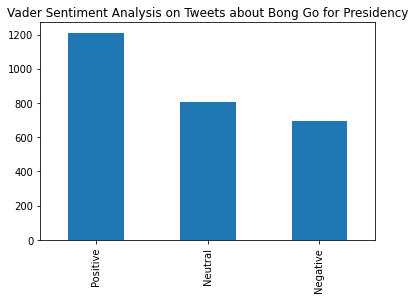

In [ ]:
tweets_sentiment.sentiment_type.value_counts().plot(kind='bar',title="Vader Sentiment Analysis on Tweets about Bong Go for Presidency")

#Topic Modeling through Gensim LDA on Tweets

> For topic modeling, the tweets are cleaned again to remove stopwords from showing up in the analysis and visualization.

> With the dictionary, the document is converted into a bag of words and ran through topic modeling to find out the reoccuring topics, salient terms, and relevant words.





In [ ]:
import nltk
nltk.download('stopwords')
#https://stackoverflow.com/a/47007462
from nltk.corpus import stopwords
stopwords = stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopwords(tweets):
    tweets['removed_stopwords'] = tweets['cleaned_text'].fillna('')
    tweets['removed_stopwords'] = tweets['removed_stopwords'].apply(lambda x: ' '.join([w for w in x.split() if w not in (stopwords)]))
    return tweets

In [ ]:
removed_stopwords = remove_stopwords(tweets_sentiment)
removed_stopwords[['cleaned_text', 'removed_stopwords']].tail()

,cleaned_text,removed_stopwords
2704,There we go,There go
2705,I&#39;ve watched the whole video whoever you vote for BBMSara or Bong Go Duterte as long as it&#39;s NOT Leni Isko Manny or Ping,I&#39;ve watched whole video whoever vote BBMSara Bong Go Duterte long it&#39;s NOT Leni Isko Manny Ping
2706,NOTE Guys whether youre pro or against Bong Bong or Bong Go please refrain from badmouthing one for the other Focus on highlighting your candidates strengths instead They are not our enemy and the...,NOTE Guys whether youre pro Bong Bong Bong Go please refrain badmouthing one Focus highlighting candidates strengths instead They enemy fought Ctto MJ Quiambao Reyes
2707,Are you saying the DavaoSara people tipped off the Senate people about Bong Gos people,Are saying DavaoSara people tipped Senate people Bong Gos people
2708,Si bong go,Si bong go


In [ ]:
removed_stopwords.to_csv('cleaned_translated_bonggo_tweets.csv', index=False)

In [ ]:
tweets_topic = pd.read_csv('cleaned_translated_bonggo_tweets.csv', index_col=None, header=0)

In [ ]:
#!pip install gensim
#!pip install pyLDAvis

In [ ]:
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel
import pyLDAvis, pyLDAvis.gensim_models

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
split_texts = [str(doc).split() for doc in tweets_topic['removed_stopwords']]
dictionary = Dictionary(split_texts)
corpus = [dictionary.doc2bow(text) for text in split_texts]
corpus

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)],
 [(5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1)],
 [(5, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1)],
 [(0, 1), (2, 1), (20, 1), (21, 1), (22, 1), (23, 1)],
 [(5, 1), (24, 1), (25, 1), (26, 1)],
 [(5, 2),
  (15, 1),
  (24, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1)],
 [(5, 1),
  (16, 1),
  (24, 1),
  (28, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 2),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1)],
 [(0, 1),
  (2, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1)],
 [(5, 1),
  (24, 1),
  (77, 1),
  (78, 1),
  (79, 1),


In [ ]:
lda = LdaModel(
    corpus=corpus, 
    id2word=dictionary, 
    num_topics=3
)

topics = lda.print_topics()

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda, corpus, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.074292  0.018657       1        1  41.237737
0     -0.017366 -0.061885       2        1  33.614034
1     -0.056926  0.043228       3        1  25.148229, topic_info=          Term        Freq       Total Category  logprob  loglift
79           I  619.000000  619.000000  Default  30.0000  30.0000
0         bong  459.000000  459.000000  Default  29.0000  29.0000
202         na  173.000000  173.000000  Default  28.0000  28.0000
22          si  175.000000  175.000000  Default  27.0000  27.0000
2           go  588.000000  588.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
79           I   53.443714  619.298370   Topic3  -5.2736  -1.0696
327       also   28.303214  118.780084   Topic3  -5.9092  -0.0539
267    Senator   24.012420   71.875011   Topic3  -6.0736   0.2840
103        The   28.431428  151.519915   Topic3  -5.9047  -0.2928
125  president   28.696069  200.653321   Topic3  -5.8954  -0.5644

[261 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
7493      2  0.955648  Against
6539      1  0.970648     Also
262       1  0.695938      And
262       2  0.245625      And
262       3  0.040938      And
...     ...       ...      ...
320       3  0.136928     work
659       2  0.947550  written
203       1  0.047077      yan
203       2  0.721854      yan
203       3  0.219695      yan

[404 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 1, 2])